# Apéndice A  

## Análisis de contribuciones (AC) 

En este cuaderno de Jupyter se realizan las estadísticas necesarias para el capítulo 4 en el apartado de análisis institucional. Aquí se detallan los pasos y correcciones de las versiones. Se implementan bibliotecas como pandas, numpy y beautifulsoup, creadas por la comunidad para su uso en IA, Data Science, Business Intelligence y análisis de datos. Todo lo implementado aquí es software libre y constituye mi contribución al bien común intangible GNU/Linux. Naturalmente, todo está comentado para explicar los procesos ejecutados en el cuaderno.

**Nota_0:** El análisis se inició generando mis propias estadísticas y funciones, pero en la tesis se empieza con las estadísticas oficiales.

**Nota_1:** Este cuaderno está programado para ejecutarse en Jupyter en GNU/Linux. No es compatible con Windows a menos que se adapte Git y se realicen algunas correcciones en el código, como las diagonales y las rutas a utilizar. Sin embargo, está publicado bajo la GPL para su comprensión y reutilización de mi código, siempre y cuando se cite y se reconozca mi autoría.

En un cuaderno en Jupiter en el sistema GNU/Linux lo primero que hacemos es clonar el repositorio específicamente de GNU/Linux en nuestra carpeta local.
Este se encuetra alojado en :

https://github.com/torvalds/linux


Utilizamos magic bash para llamar a git y bash desde este cuaderno
Clonamos el repositorio con el siguiente comando 


In [ ]:
%%bash
git clone https://github.com/torvalds/linux


Directorios

In [ ]:
%%bash 
mkdir Datasets
mkdir Capturas
mkdir Backups
mkdir Markdown 
mkdir Scripts
mkdir Diccionarios 
mkdir Datasets_test
mkdir Cuadernos
mkdir Auxiliares_Tex


In [1]:
# El siguiente script mide los commits por Autor en la historia de GNU/Linux
# Cada comando trae su descripción para ser más entendible

## Librerías 
import subprocess ## Llama subprocesos del sistema como Git. Funciona nativamente en GNU/Linux y se necesita para correr comandos de Git.
import pandas as pd ## Librería famosa para Ciencia de Datos, utilizada para el proceso ETL.
import io ## Operaciones de entrada y salida de Datos.

# Directorio local del repositorio Git
directorio = '//home/carlos/Tesis/TESIS FE UNAM/Apendice_A/linux/'

# Ejecutar el comando git log y capturar la salida agrupando la salida
resultado = subprocess.run(
    ["git", "log", "--format=%H %an"], 
    stdout=subprocess.PIPE, 
    cwd=directorio  # Directorio de trabajo
).stdout

# Decodificar la salida ignorando los caracteres no válidos
resultado_decodificado = resultado.decode('utf-8', errors='ignore')
# Convertir la salida en un DataFrame de Pandas con la función Split
lines = resultado_decodificado.split('\n')
# Divide por espacio y un ciclo for para recorrer la lista y crear una lista de listas
data = [line.split(' ', 1) for line in lines if line]
# Crear un DataFrame con los datos y nombrar las columnas
df = pd.DataFrame(data, columns=['Commit', 'Autor'])
# Hacer una Tabla pivote con la funcion count (contar) el número de commits por Autor
tabla_pivote = df.pivot_table(index='Autor', values='Commit', aggfunc='count')
# Renombrar la columna de conteo de commits
tabla_pivote = tabla_pivote.rename(columns={'Commit': 'Cantidad_commits'})
# Ordenar de mayor a menor por autor y reset index para convertir a df
tabla_pivote = tabla_pivote.sort_values(by='Cantidad_commits', ascending=False).reset_index()
# Remplazar los NA y valores nulos por la palabra desconocido
tabla_pivote['Autor'].fillna('desconocido', inplace=True)
tabla_pivote['Autor'].replace('', 'desconocido', inplace=True)
tabla_pivote


Autor  Cantidad_commits
0                  Linus Torvalds             38802
1                 David S. Miller             15335
2                   Arnd Bergmann             10519
3                      Mark Brown              9894
4               Christoph Hellwig              9051
...                           ...               ...
27758               Karsten Blees                 1
27759             Karoly Lorentey                 1
27760  Max.Nekludov@us.elster.com                 1
27761            Arkadiusz Bokowy                 1
27762                         추지호                 1

[27763 rows x 2 columns]

In [2]:
# Con el siguiente comando realizamos estadísticas descriptivas de la tabla pivote.
tabla_pivote.describe()

Cantidad_commits
count      27763.000000
mean          44.440983
std          366.508476
min            1.000000
25%            1.000000
50%            3.000000
75%           11.000000
max        38802.000000

In [3]:
# Total de commits
tabla_pivote.Cantidad_commits.sum()

1233815

Con un total de 1,233,815 contribuciones en Git hasta la fecha del 21 de noviembre de 2023 y una media de 44, con una desviación estándar de 366, indican que los datos tienen una dispersión considerable. De los 27,763 autores a lo largo de la historia de GNU/Linux, el promedio de las contribuciones realizadas es de 44. Sin embargo, la desviación estándar es de 366, lo que se considera disperso, dado que la mínima de contribuciones es 1 y la máxima es de 38,802 hechas por Torvalds.

<Axes: >

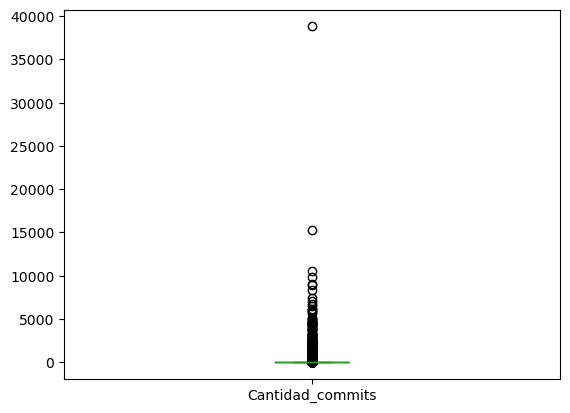

In [4]:

#El diagrama de caja representa gráficamente información sobre la distribución estadística de un conjunto de datos.

tabla_pivote.Cantidad_commits.plot.box()

In [5]:
# Calculamos la moda
tabla_pivote.Cantidad_commits.mode()

0    1
Name: Cantidad_commits, dtype: int64

Dado lo anterior, podemos concluir que existe una gran concentración en el número de contribuciones al desarrollo de GNU/Linux. El número de contribuciones importantes supera las 15,000 y aparentemente solo dos autores son responsables de ellas. La comunidad se centra incluso por debajo de las 15,000 contribuciones, pero esto podría deberse a la forma en que se aprueban los cambios o las fusiones en dichos commits. Muchos líderes del proyecto crean un nuevo commit a partir del anterior, lo que significa que debemos analizar las interacciones entre commits y fusiones (pull requests).

Por otro lado, la importancia de un autor puede variar. Es decir, ¿con qué propósitos se realizaron esos commits? Un autor que realiza pocos commits pero que introducen cambios significativos, solucionan errores críticos o implementan características importantes puede tener un impacto sustancial en el proyecto.

In [6]:
# Para experimentar quitaremos los commits de un autor y a los 2 principales autores
# El siguiente comando borra los 2 principales autores y los commits de un solo autor 
df_Not_tolvards_y_miller = tabla_pivote.drop(tabla_pivote.index[:2]).reset_index()
df_Not_tolvards_y_miller.drop('index', axis=1, inplace=True)
df_Not_tolvards_y_miller = df_Not_tolvards_y_miller[df_Not_tolvards_y_miller['Cantidad_commits'] != 1]
df_Not_tolvards_y_miller = df_Not_tolvards_y_miller[df_Not_tolvards_y_miller['Cantidad_commits'] != 2]

In [7]:
# .describe() da un resumen estadístico de la dataframe
df_Not_tolvards_y_miller.describe()

Cantidad_commits
count      13998.000000
mean          83.033433
std          372.940444
min            3.000000
25%            5.000000
50%           11.000000
75%           36.000000
max        10519.000000

<Axes: >

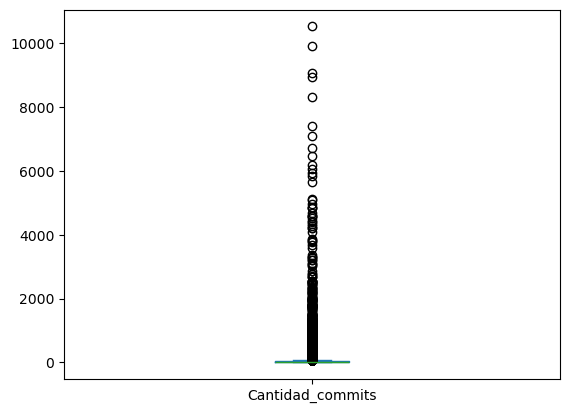

In [8]:
df_Not_tolvards_y_miller.Cantidad_commits.plot.box()

In [9]:
df_Not_tolvards_y_miller.to_csv('Datasets_test'+'/' + 'commits_no_tolvars.csv', index=0)


In [10]:
df_Not_tolvards_y_miller.head(50)

Autor  Cantidad_commits
0              Arnd Bergmann             10519
1                 Mark Brown              9894
2          Christoph Hellwig              9051
3               Takashi Iwai              8924
4      Mauro Carvalho Chehab              8311
5                    Al Viro              7414
6         Greg Kroah-Hartman              7081
7            Thomas Gleixner              6713
8               Chris Wilson              6468
9         Geert Uytterhoeven              6176
10               Ingo Molnar              6057
11         H Hartley Sweeten              5942
12             Johannes Berg              5835
13       Krzysztof Kozlowski              5658
14              Russell King              5117
15             Dan Carpenter              5069
16             Ville Syrjälä              4948
17           Andy Shevchenko              4855
18              Eric Dumazet              4829
19         Rafael J. Wysocki              4827
20               Dave Airlie              4689
21         Kuninori Morimoto              4591
22             Linus Walleij              4590
23              Hans Verkuil              4574
24          Uwe Kleine-König              4535
25              Alex Deucher              4416
26                 Tejun Heo              4380
27  Arnaldo Carvalho de Melo              4341
28            Jakub Kicinski              4284
29          Laurent Pinchart              4206
30            Colin Ian King              4192
31             Hans de Goede              4071
32             Daniel Vetter              3850
33           Trond Myklebust              3827
34            Peter Zijlstra              3799
35            Olof Johansson              3756
36                Ben Skeggs              3689
37          Paul E. McKenney              3584
38              Randy Dunlap              3373
39                Jens Axboe              3298
40               Joe Perches              3297
41           Masahiro Yamada              3262
42              Johan Hovold              3209
43             David Howells              3203
44             Bjorn Helgaas              3116
45                 Lee Jones              3090
46           Kent Overstreet              3060
47                  Axel Lin              3011
48              Wolfram Sang              2856
49             Tony Lindgren              2777

Dado lo anterior, podemos concluir que siguen existiendo outliers, sin embargo, sigue siendo una cantidad considerable de autores que han contribuido al código GNU/Linux, con 17,611 autores que han realizado 2 o más contribuciones en la historia desde la importación del proyecto a Git, excluyendo a Linus Torvalds y David S. Miller. Esto se compara con los 27,763 autores que han contribuido en toda la historia. La media de contribuciones se incrementó a 66, mientras que la desviación estándar es de 344. Los datos siguen siendo dispersos, pero esto nos indica que los líderes de cada proyecto y librería en el kernel están relacionados de manera diferente y tienen diferentes formas de contribuir.

Respondiendo a la pregunta de concentración, efectivamente Torvalds y Miller son los que han contribuido más y concentran los commits. Una salida de Torvalds y Miller del proyecto impactaría sin duda en el desarrollo del kernel, lo que podría retrasarlo pero no privatizarlo, debido a las restricciones de la GPL. Existen muchos espejos del kernel y la comunidad de GNU/Linux es demasiado grande para depender exclusivamente de Torvalds y Miller.

Sin embargo, identificar los "principales" autores únicamente basándose en la media de sus contribuciones podría no ser suficiente, ya que algunos autores podrían haber realizado pocas contribuciones pero extremadamente significativas, mientras que otros podrían haber realizado muchas contribuciones de menor importancia. Hay muchos estilos de programación y formas de entender el proyecto, y esa es la magia de un bien común intangible y colaborativo.

## Análisis de la muestra de Octubre y Noviembre de 2023 del kernel GNU/Linux 6.6

En este apartado, utilizaremos una parte del *dataframe* para delimitar los autores que, hasta octubre y noviembre de 2023, han colaborado en GNU/Linux. Además, emplearemos herramientas técnicas como el *scrapping* o raspado de datos para relacionar a los autores con su empresa empleadora, con el fin de tener una idea de qué empresas participan en la construcción del Kernel de GNU/Linux. 

Delimitamos esa fecha porque en octubre pasado del 2023 se publicaron las estadísticas oficiales del kernel 6.6 de GNU/Linux en el sitio web “https://lwn.net/Articles/948970/”, que detallan quiénes participan en su colaboración. Sin embargo, en dichas estadísticas solo se presentan los 10 o 20 principales participantes. Naturalmente, la forma de construir dichas estadísticas es a través del potente Git. 

Es importante realizar este proceso de manera ética, utilizando el motor de búsqueda de Google sin saturar sus servicios y buscador. Para ello, se programó un algoritmo que realiza la búsqueda eficientemente de datos del autor. Hasta la fecha, este algoritmo funciona correctamente. No obstante, es importante señalar que el script puede cambiar y puede que en el futuro no funcione correctamente si Google modifica su código. A continuación, se muestra el código para realizar esta tarea utilizando Python:

In [11]:
# Reutilizamos el código de extracción de nombres de autores de Git
# Agregamos la fecha de noviembre

import subprocess
import pandas as pd
import io

# Directorio del repositorio Git
directorio = '//home/carlos/Tesis/TESIS FE UNAM/Apendice_A/linux/'

# Fecha de referencia delimitada a octubre y noviembre (tomada después de la especificada)
fecha = '2023-10-01'
# fecha = '2023-11-05'

# Ejecutar el comando git log y capturar la salida agrupando la salida
resultado = subprocess.run(
    ["git", "log", "--format=%H %an", "--after={}".format(fecha)], 
    stdout=subprocess.PIPE, 
    cwd=directorio  # Establecer el directorio de trabajo
).stdout

# Decodificar la salida ignorando los caracteres no válidos
resultado_decodificado = resultado.decode('utf-8', errors='ignore')
# Convertir la salida en un DataFrame de Pandas con Split
lines = resultado_decodificado.split('\n')
# Dividir por espacio y un ciclo for para recorrer la lista y crear una lista de listas
data = [line.split(' ', 1) for line in lines if line]
# Crear un DataFrame con los datos y nombrar las columnas
df = pd.DataFrame(data, columns=['Commit', 'Autor'])
# Hacer una Tabla pivote con la función count (contar) el número de commits por autor
tabla_pivote = df.pivot_table(index='Autor', values='Commit', aggfunc='count')
# Renombrar la columna de conteo de commits
tabla_pivote = tabla_pivote.rename(columns={'Commit': 'Cantidad_commits'})
# Ordenar de mayor a menor por autor y resetear el índice para convertir a dataframe
tabla_pivote = tabla_pivote.sort_values(by='Cantidad_commits', ascending=False).reset_index()
# Reemplazar los NA y valores nulos por la palabra "desconocido"
tabla_pivote['Autor'].fillna('desconocido', inplace=True)
tabla_pivote['Autor'].replace('', 'desconocido', inplace=True)
tabla_pivote


Autor  Cantidad_commits
0        Kent Overstreet              2713
1         Linus Torvalds               381
2       Uwe Kleine-König               272
3              Kees Cook               134
4         Jakub Kicinski               132
...                  ...               ...
1543         Fabian Vogt                 1
1544  Nava kishore Manne                 1
1545         Eymen Yigit                 1
1546       Eugenio Pérez                 1
1547            Peter Xu                 1

[1548 rows x 2 columns]

In [12]:
# Descripción de Estadísticas
tabla_pivote.describe()

Cantidad_commits
count       1548.000000
mean           8.235142
std           70.830051
min            1.000000
25%            1.000000
50%            2.000000
75%            6.000000
max         2713.000000

In [76]:
tabla_pivote['Autor'].head(50)

0             Kent Overstreet
1              Linus Torvalds
2            Uwe Kleine-König
3                   Kees Cook
4              Jakub Kicinski
5          Geert Uytterhoeven
6               Arnd Bergmann
7                 Rob Herring
8         Bartosz Golaszewski
9                 Chuck Lever
10                Jeff Layton
11               Justin Stitt
12            Andy Shevchenko
13    Matthew Wilcox (Oracle)
14                 Mark Brown
15               Eric Biggers
16           Philipp Hortmann
17          Thomas Zimmermann
18              Filipe Manana
19            Thomas Gleixner
20              Dan Carpenter
21           Dmitry Baryshkov
22              Linus Walleij
23                 Ian Rogers
24                   Qi Zheng
25          Rafael J. Wysocki
26         Greg Kroah-Hartman
27              Konrad Dybcio
28               Eric Dumazet
29              Ilpo Järvinen
30            Hannes Reinecke
31              SeongJae Park
32                 Ben Skeggs
33        

## Funciones y Diccionario

Después de varias pruebas consistentes, se notaron varias cosas interesantes que sucedieron en el proceso de escribir el script. Una de ellas es que, en varias ocasiones, la función más importante del código, que es "find_authors_keywords", colapsaba al iterar cierta cantidad de veces, seguramente por usar el buscador de Google demasiadas veces. Sin embargo, esto se realiza con fines académicos y éticos. En el código se detalla cómo se resolvió (un pequeño hack), que en palabras técnicas se realizó un procesamiento por lotes y con tiempos distantes de iteración, introduciendo error humano de manera artificial. Además, otro problema es que al fragmentar o procesar por lotes, los archivos se corrompían y así no se podría realizar la identificación de los empleadores de los autores de los commits, lo que confundía al diccionario y no se identificaba al empleador. También se resolvió de una manera interesante. Por último, los resultados también resultaron muy interesantes de estos 2 meses comparados con las estadísticas de un sitio web que muestra estadísticas oficiales del kernel y al parecer con la técnica que se utilizó aquí.

El algoritmo de Google es una maravilla de la ingeniería. Lo que hace este algoritmo es tener bots (programas automáticos que se ejecutan solos) que actualizan la información si esta tiene algún cambio. Es decir, si hay cambios, por ejemplo, cambio de compañía de alguno de nuestros amigos desarrolladores, Google lo detectará. Lo que nos toca hacer es únicamente realizar el procesamiento de los datos a través de un diccionario. El procesamiento del lenguaje natural (PLN) es una rama de las ciencias de la computación, de la inteligencia artificial y de la lingüística que estudia las interacciones entre las computadoras y el lenguaje humano. En especial, usaremos parte de la PLN: un diccionario, que nos permitirá relacionar un conjunto de frases o palabras del extracto de búsqueda (sopa de palabras) que nos arroje una función de búsqueda para identificar las empresas para quienes trabajan nuestros amigos desarrolladores del kernel GNU/Linux.

A continuación, el código fuente:

In [13]:
#### Declaramos funciones y diccionarios
# Se construyeron varias funciones hijas de la función padre constructor. 
# Librerías utilizadas por las funciones

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import random as rndm
import os
import pandas as pd
from send2trash import send2trash
import plotly.express as px
import matplotlib.pyplot as plt
import squarify

# Directorios

directorio = '/home/carlos/Tesis/TESIS FE UNAM/Apendice_A/linux/'

# carpetas

datasets = directorio + "/" + "Dataset"

# recibe la lista de autores y palabras relacionadas con la busqueda. Ejemplo para realizar una busqueda más exacta de un autor de cocina en google ponemos el nombre por ejemplo "Luis Peralta"
# Pero tal vez el chef no sea tan conocido y aparezcan más Luis Peralta, entonces buscamos "Luis Peralta Chef" y así google hará una busqueda más exacta 
def find_authors_keywords(authors_list, palabra_semantica,aleatorio_i,aleatorio_f):
    '''
    find_authors_keywords: Función que utiliza Beautiful Soap para extraer "palabras clave" en una busqueda de Google. 
    autor_list: Recibe una lista de autores.
    palabra_semantica: Recibe la palabra semántica o relacionada con la busqueda
    

    '''
    # Script
    # Crea un diccionario para almacenar las palabras clave de cada autor
    authors_keywords = {}
    authors_keywords = {}
    contador = 1 

    for author_name in authors_list:
        # Crea una lista para almacenar las palabras clave del autor actual
        keywords_list = []
        print(f"Iteración {contador}: {author_name}")
        #print(author_name)
        contador += 1  # Incrementa el contador para la siguiente iteración
        aleatorio = rndm.randint(aleatorio_i,aleatorio_f)
        time.sleep(aleatorio)


        # Busca el nombre del autor en un motor de búsqueda
        google_url = f"https://www.google.com/search?q={author_name + ' ' + palabra_semantica}"
        #print(google_url) trae con get todo lo obtenido de la variable google_url
        google_response = requests.get(google_url)
        if google_response.status_code == 200:
        # El contenido de la respuesta
            print(google_response.text)
        else:
        # Imprimir un mensaje de error si la solicitud no fue exitosa
            print(f"Error: {google_response.status_code}")
        google_soup = BeautifulSoup(google_response.content, 'html.parser')

        # Examina los resultados de la búsqueda
        # La class es para buscar las palabras clave en la sopa HTML (Me costó encontrar la forma ya que tengo pocas nociones de HTML y Javascript)

        for result in google_soup.find_all('div', class_='BNeawe s3v9rd AP7Wnd'):
            keywords_list.append(result.text)

        # Almacena las palabras clave del autor en el diccionario
        authors_keywords[author_name] = keywords_list
        #print(authors_keywords)

    return authors_keywords # Regresa las palabras clave de la busqueda delimitadas por comillas simples ''

# Función para contar archivos TEMP si colapsó "find_authors_keywords"

def contar_archivos_temp():
   # Script
    contador = 0 # Inicia en 0 porque los objetos en Python inician en 0
    for archivo in os.listdir('.'): # for para iterar en lista todo lo terminado en "."
        if archivo.startswith('TEMP_') and archivo.endswith('.pkl'): # condicional para delimitar lo que inicia con TEMP y termina con pkl
            contador += 1 # contador agregado suma 1 en cada ciclo
    return contador # Devuelve el número de archivos TEMP 

# funcion procesar fragmentos en formato pickle que guarda un fragmento de DF sin cambiar '' ni cosas raras ya que falló al guardar en csv y volver a importar la DF

def procesar_fragmentos(df_lista_fragmentos, numero_temp_creados,aleatorio_i,aleatorio_f,palabra_semantica): # Función para procesar y reiniciar el fragmentado o procesamiento por lotes
    for i, fragmento in enumerate(df_lista_fragmentos[numero_temp_creados:], start=numero_temp_creados): # si murió el proceso de la función "find_authors_keywords" itera sobre la DF muerta.
        print("TIEMPO DE ESPERA de 30 a 55 SEGUNDOS")
        aleatorio = rndm.randint(30, 55) # Aleatorio para simular humanidad
        time.sleep(aleatorio) 
        authors_keywords_i = find_authors_keywords(fragmento,aleatorio_i,aleatorio_f,palabra_semantica) # invoca la función "find_authors_keywords" 
        df_keys_i = pd.DataFrame(authors_keywords_i.items(), columns=['Autor', 'Palabras Clave']) # convierte la salida en DF
        print(f"Fragmento procesado : {i}, Palabras Clave: {len(authors_keywords_i)}") # imprime variables para ver el número de iteraciones
        df_keys_i.to_pickle(f'TEMP_{i}.pkl') # lo guarda en un temporal pkl


# Función para enlistar la lista de TEMPS y borrarlos 


def leer_archivos_pickle():
    Lista_df_temps = []
    for archivo in os.listdir('.'):
        if archivo.startswith('TEMP_') and archivo.endswith('.pkl'): # incia con 'TEMP_' y termina con '.pkl'
            df_iterador = pd.read_pickle(archivo) 
            Lista_df_temps.append(df_iterador)  # Agregar DataFrame a la lista
            send2trash(archivo)  # Mover el archivo a la papelera después de leerlo


    # Combinar todos los DataFrames de la lista en un solo DataFrame
    df_completo = pd.concat(Lista_df_temps, ignore_index=True)
    # 
    
    return df_completo


# Esta función se corre varias veces si falla "find_authors_keywords" hasta completar el datframe completo. 
# Dividimos en 80 lineas para no saturar el servicio de el motor de busqueda de Google

def constructor_df(tabla_pivote,lineas_soportadas
                   ,palabra_semantica,aleatorio_i,aleatorio_f):
    '''Función que construye a base de funciones hijas la Dataframe para extraer los autores y sus palabras clave o palabra semántica
    tabla_pivote: Dataframe donde se encuentran los autores con el Nombre de columna 'Autor'
    lineas_soportadas: Número de lineas con la que el usuario desea que se fracmente la dataframe. 80 es el default
    palabra_semantica: La palabra Semántica o relacionada con la búsqueda en google 
    aleatorio_i: Aleatorio inicial. Segundo ( >= 1) que se desea que se retrase la búsqueda para iterar de manera no constante 
    aleatorio_f: Aleatorio final. Segundo final que se desea para que varie la busqueda  ( aleatorio_i < aleatorio_f)

    '''
    df_keys = pd.DataFrame()
    print(f"Constructor inciandose, líneas a iterar: " + str(lineas_soportadas))
    if len(tabla_pivote) > lineas_soportadas:
        tamaño = len(tabla_pivote) # Medir el tamaño de la tabla pivote
        print("Se fragmentará el DataFrame")
        lineas_por_fragmento = lineas_soportadas  # número de filas por fragmento
        n = lineas_por_fragmento 
        num_fragmentos = tamaño // n + (tamaño % n > 0)  # Calcular la cantidad de fragmentos
        print(f"EL NÚMERO DE FRAGMENTOS A EXPORTAR SON {num_fragmentos}")
        df_simple_autores = tabla_pivote
        df_simple_autores = df_simple_autores.drop('Cantidad_commits', axis=1) # Solo se necesita los autores, se borra los commits 
        df_lista_fragmentos = []  # Lista para almacenar los fragmentos del DataFrame
    
        for i in range(num_fragmentos): # Crea el número de fragmentos contando por i
            inicio = i * n
            fin = min((i + 1) * n, tamaño)  # Evitar que el último fragmento exceda el tamaño del DataFrame
            df_fragmento = df_simple_autores.iloc[inicio:fin].copy()['Autor'].to_list()  # Extraer el fragmento del DataFrame original y convertirlo a una lista
            df_lista_fragmentos.append(df_fragmento)  # Agregar el fragmento a la lista de fragmentos
        
        # Ver la lista de fragmentos (Opcional) sirve para ver que inicie bien el dataframe sobre el fragmento correcto 
        #for fragmento in df_lista_fragmentos:
        #    print(fragmento)
        # Función para comprobar si hay archivos TEMPS en la carpeta por si colapsó el scrapper, inicia sobre el último TEMP creado"
        
        numero_temp_creados = contar_archivos_temp()
        print(f"COMPROBANDO TEMPORALES '.pkl' {numero_temp_creados} ")
        # Función para procesar los fragmentos y crearlos y reiniciar el proceso si falló la función find_autors 
        procesar_fragmentos(df_lista_fragmentos, numero_temp_creados,palabra_semantica,aleatorio_i,aleatorio_f)
        # Condicional para comprobar el número de fragmentos y llamar a la función que crea el resultado 
        if num_fragmentos == numero_temp_creados:
            # Función que une los TEMPS y los borra hasta que se cumpla la condición
            df_keys = leer_archivos_pickle()
            # Respaldo de la DF (Opcional)
            print("PROCESO COMPLETADO")
            # print(df_keys)
        else:
            # Reintenta procesar el ciclo, negación de la negación
            df_keys = leer_archivos_pickle()
            print("PROCESO COMPLETADO")

        # return df_keys
            
            
    else:

        # Llamar simplemente al buscador de scrapping
        lista_ofiginal_autores = tabla_pivote['Autor'].to_list()
        print("Lista de autores a iterar :"+ str(len(lista_ofiginal_autores)))
        # Buscar palabras clave asociadas a los autores
        authors_keywords = find_authors_keywords(lista_ofiginal_autores)
        # Crear un DataFrame con las palabras clave de los autores
        df_keys = pd.DataFrame(authors_keywords.items(), columns=['Autor', 'Palabras Clave'])
        # Mostrar el DataFrame
        # print(df_keys)
    
    return df_keys
##################################################################



### Diccionario 

Para la búsqueda de palabras clave, la construcción del diccionario es primordial. En este caso, lo hice manualmente, buscando las palabras, sobre todo en inglés, relacionadas con las empresas asociadas. Por ejemplo, sabemos que Red Hat produce Fedora, CentOS y usa "@redhat.com" como dominio de correo electrónico. Entonces, en el diccionario, podemos encontrar la empresa al principio en un objeto lista y luego las palabras clave: "Red Hat': ['Red Hat', 'Fedora', 'RHEL', 'RedHat', 'CentOS', 'CentOS Stream', '@redhat.com']. De esta manera, la función de búsqueda podrá hacer su trabajo correctamente.

In [149]:

# Diccionario nuevo que relaciona a los autores y palabras clave con los empleadores o Empresas, o fundaciones 
# Hay que agregar más empresas y palabras clave para la busqueda automática


empresas_claves = {'AMD': ['AMD', '@amd.com','AMD GPU'], # Hardware de gráficos 
        'Aeva':['Aeva Inc'], # Tecnología automotriz   
        'Aquacomputer':['Aquacomputer'],  # computacion efriamiento y agua alemana     
        'Académico o Investigador': ['Universidad','University','Investigación','Researcher','researcher','academic','Artículo','article','PhD','Ph.D','Ph.D student'],
        'ALSA':['Advanced Linux Sound Architecture','ALSA','Advanced','Linux Sound Architecture Community'],
        'Alibaba Cloud': ['Alibaba Cloud', 'Alibaba'], # comercio elctrónico servidores
        'Analog Devices': ['Analog Devices'],
        'Amazon' : ['Amazon', 'Engineer at Amazon Web Services', 'AWS'], # Consumibles, SaS, software, cloud, computo en la nube
         #'Arm Ltd': ['Arm Ltd', 'ARM','DS-5', 'RealView' ,'Keil'],
        'Arm Ltd': ['Arm Ltd','DS-5', 'RealView' ,'Keil'],
        'Bootlin': ['Bootlin'], # Software 
        'Broadcom' : ['Broadcom Limited','Broadcom'], # Semiconductores 
        'Canonical': ['Ubuntu', 'Canonical', 'Lubuntu', 'Canonical Group Limited'], # Software 
        'Cisco': ['Cisco'], # software y hardware 
        'Cirrus Logic': ['Cirrus Logic'], # Semiconductores 
        'Collabora': ['Collabora'], # Software open source
        'DigitalOcean': ['DigitalOcean'], # Servicios en la nube
        'Emprendedor': ['Emprendedor', 'Entrepreneur', 'founder and CEO','Consultant'],
        'Fujitsu': ['Fujitsu'], # software y hardware 
        'Freescale semiconductor':['Freescale semiconductor'], # semiconductores
        'Google': ['Alphabet','Google','Deepmind', 'ChromeOS', 'google', 'Bard', 'Android', 'Go library',' Production Linux Kernel at Google'], # software y hardware 
        'Gobierno': ['government', 'authority', 'regime', 'ruling', 'leadership','embassies', 'diplomatic missions', 'foreign missions','institutions', 'establishments', 'entities'],
        'HP': ['Hewlett Packard Enterprise', 'HP'], # hardware pc y servidores
        'Huawei Technologies': ['Huawei Technologies','Huawei'], # software y hardware 
        'Hovold Consulting AB':['Hovold Consulting AB'], # consultoría software
        'Hitachi':['Hitachi','Renesas Technology','Mitsubishi Electric Corporation'], # Hardware electrodómesticos 
        'Ideas on Board':['Ideas on Board'], # software y hardware
        'IBM': ['IBM', 'PowerPC', 'zSeries', '@linux.ibm.com', 'ibm'], # software y hardware 
        'Intel': ['Intel', 'intel','Intel Corporation'], # software y hardware 
        'Juniper Networks, Inc':['Juniper Networks Graphic','Juniper Networks'], # software y hardware 
        'Lenovo': ['Lenovo', 'Thinkpad', 'Ideapad'], # hardware 
        'Linaro': ['Linaro', 'linaro', 'GPIO', 'UPnP', 'ARM'], # hardware y software
        #'Linaro/Arm Ltd': ['Linaro', 'linaro', 'GPIO', 'UPnP', 'Arm Ltd'],
        'Linux Foundation': ['Linux Foundation','Linus Benedict Torvalds (Helsinki, Finlandia'], 
        'Loongson':['Loongson'], # Institute of Computing Technology (ICT) China publica
        'Marvell Technology, Inc':['Marvell Technology, Inc.'], # microchips
        'Meta': ['facebook', 'facebook/rocksdb', 'Facebook', 'Meta'], # SaS 
        'Microsoft': ['Microsoft','Microsoft Research'], # software y hardware 
        'Microchip Technology Inc':['Microchip Technology Inc','@microchip.com','Atmel Corporation'],# Hardware Atmel fue comprado por Microchip
        'Micron Technology':['Micron Technology', 'MICRON','Micron'], # microchips, semiconductores
        'Micro Focus International plc': ['Attachmate Corporation','Novell','Novell eDirectory', 'Novell Open Enterprise Server', 'Novell NetWare'], # software y hardware  
        'MediaTek':['MediaTek'], # hardware 
        'Motorola':['Motorola'], # software y hardware 
        'NVIDIA': ['@NVIDIA', 'NVIDIA', '@nvidia.com','Nvidia Tegra',' Nvidia', 'GPU NVIDIA'], # software, IA y hardware 
        'NXP Semiconductors': ['NXP Semiconductors'], # Semiconductores
        'National   Semiconductor':['National   Semiconductor'], # Semiconductores
        'OVH SAS': ['OVH SAS'], # Software y Hardware computo en la nube, cloud 
        'Oracle': ['Oracle Linux', 'Oracle', 'Oracle Linux Kernel Engineer', 'at Oracle'], # software 
        'Philips':['Philips'], # electrodomésticos 
        'Pengutronix': ['Pengutronix'], # software y hardware 
        'Paytm':['Paytm'], # Servicios financieros y de pago 
        'Qualcomm': ['Qualcomm', 'Atheros', 'Atheros Communications', 'Atheros'], # Hardware como antenas wifi, semiconductores, procesadores
        'Red Hat': ['Red Hat', 'Fedora', 'RHEL', 'RedHat','RedHat kernel', 'CENTOS', 'CentOS Stream', '@redhat.com'], # software 
        'Renesas Electronics': ['Renesas Technology','Renesas Electronics'], # semiconductores 
        'Rivos Inc': ['Rivos Inc', 'Rivos'], # startup de semiconductores 
        'Sasken Technologies': ['Sasken Technologies'], # software India
        'SUSE': ['SUSE Labs', 'Suse linux', 'SUSE'], # software 
        'Sector Finaciero':['Bank', 'Banco','Sector financiero','Finance'], 
        'Sisense Inc': ['Sisense Inc', 'Sisense'], # BI software, inteligencia de negocios, IA 
        'Tesla': ['Tesla'],# industria automotríz 
        'Texas Instruments': ['Texas Instruments'], # hardware 
        'Toshiba':['Toshiba','Toshiba Corporation'], # hardware 
        'Thales Group':['Thales Group', 'Thales-Vormetric'], # Defensa militar
        'VirtualHere':['VirtualHere'], # Software y virtualización
        'Vivo Communication Technology Co. Ltd':['Vivo','Vivo Communication Technology Co','vivo','@vivo.com'], # smartphones
        'Voluntario': ['Self-employed','Patreon','volunteering','volunteer','My volunteering work','FLOSS','creador','development enthusiast','DIGImend'], # DIGImend proyecto graficas tablet ALSA
        'SPI fundation': ['Debian'], # software 
        'Spreadtrum':['Spreadtrum'], # semiconductores 
        'Spotify':['Spotify'], # software 
        'SpaceX': ['SpaceX'], # cohetes, industria aéreoespacial 
        'Samsung':['Samsung'], # microchips
        'Xiaomi':['Xiaomi'], # hardware
        'ZiLOG Inc':['ZiLOG Inc'] # hardware
        }


# Llamar a la función constructor

A continuación, se llama a la función "constructor_df", la cual automatiza la búsqueda de palabras clave. Esta función utiliza la tabla pivote del dataframe, donde se agregó el número de contribuciones y el autor. Luego, encuentra en Google las palabras clave y define las líneas soportadas de acuerdo a la capacidad del equipo de cómputo. Entre menos líneas se definan, más tardará y viceversa. Sin embargo, si se definen más líneas, es probable que Beautiful Soup tenga errores y se detenga. Lo mejor es que varíe entre 80 y 120 líneas o filas en el dataframe. También se define la palabra semántica relacionada con la búsqueda para una búsqueda más precisa. En este caso, sería el nombre del autor seguido de "kernel". Esta palabra se definió de manera más sencilla y relacionada a los autores y sus perfiles, en lugar de utilizar palabras como "Linux" o "GNU/Linux", ya que muchos desarrolladores y programadores se hacen llamar "Kernel developers". 

Las variables 'aleatorio_inicial' y 'final' simplemente representan el límite inferior y superior de segundos aleatorios en los que la función retrasará la búsqueda. Por ejemplo, si varía entre 1 y 10 segundos aleatorios, la función se ejecutará aleatoriamente en el rango de "1, 5, 7,... 10" segundos, lo cual simula el comportamiento humano. Obviamente, esto retrasará más las iteraciones que realiza el constructor. Lo notable de esta función es que si se queda congelada, se puede detener y ejecutar nuevamente sin reiniciar el "Kernel de Jupyter", y continuará desde el fragmento en el que se quedó pendiente de iterar. Al finalizar la fragmentación, la función vuelve a juntar los fragmentos en uno solo y devuelve el dataframe df_keys.

Nota: La función se queda congelada cuando el nombre del autor no cambia en la salida ni la iteración, o cuando el monitor del sistema indica que la red ya no está descargando datos de internet.


In [16]:
## Correr o ejecutar varias veces si se queda congelada. Revisar el Estado del monitor de red 
## y las iteraciones a ritmo relativamente constante. 
## 80 y 120 líneas o filas en la dataframe para simular una busqueda humana. 
## Al reiniciar los párametros: 'tabla pivote', 'lineas_soportadas' y 'palabra_semantica' NO SE MUEVEN, 
## Los párametros: aleatorio_i y aleatorio_f SI se pueden mover.
## Solo reiniciar la celda no el kernel de Python. 
## Sirve cambiar el adaptador de red o reiniciar el módem, una buena técnica para acelerar el scrapping 

df_keys = constructor_df(tabla_pivote,lineas_soportadas=300,palabra_semantica='kernel',aleatorio_i=1,aleatorio_f=2)
df_keys

Constructor inciandose, líneas a iterar: 300
Se fragmentará el DataFrame
EL NÚMERO DE FRAGMENTOS A EXPORTAR SON 6
COMPROBANDO TEMPORALES '.pkl' 6 
PROCESO COMPLETADO


Autor                                     Palabras Clave
0     Gatien Chevallier  [Embedded software engineer. OP-TEE / Linux ke...
1        Flavio Suligoi  [linux-kernel.vger.kernel.org archive mirror ·...
2     Mkrtchyan, Tigran  [1440508327-6221-1-git-send-email-tigran.mkrtc...
3           Oliver Faso  [linux-kernel.vger.kernel.org archive mirror ·...
4      Nicholas Susanto  [19 nov 2023 · Linux Kernel Mailing List <linu...
...                 ...                                                ...
1543   Willem de Bruijn  [Willem joined Google in 2011 as a kernel deve...
1544   Abhijit Gangurde  [linux-kernel.vger.kernel.org archive mirror ·...
1545       wuqiang.matt  [Experienced and accomplished kernel developme...
1546  Alexandre Mergnat  [BayLibre contributed to both kernel releases ...
1547         Peter Wang  [27 jul 2022 · This is an external index of se...

[1548 rows x 2 columns]

In [139]:
# Uniendo los DF
df_newwww = pd.merge(left=tabla_pivote, right=df_keys, how='inner', on='Autor')
df_newwww

Autor  Cantidad_commits  \
0        Kent Overstreet              2713   
1         Linus Torvalds               381   
2       Uwe Kleine-König               272   
3              Kees Cook               134   
4         Jakub Kicinski               132   
...                  ...               ...   
1543         Fabian Vogt                 1   
1544  Nava kishore Manne                 1   
1545         Eymen Yigit                 1   
1546       Eugenio Pérez                 1   
1547            Peter Xu                 1   

                                         Palabras Clave  
0     [View Kent Overstreet's profile on LinkedIn, t...  
1     [Linux kernel ============ There are several g...  
2     [linux-kernel.vger.kernel.org archive mirror ·...  
3     [Kees Cook. Portland, Oregon, United States. 6...  
4     [28 abr 2023 · Kernel TLS handles only data re...  
...                                                 ...  
1543  [From: Fabian Vogt <fabian@ritter-vogt.de> To:...  
1544  [27 mar 2023 · linux-kernel.vger.kernel.org ar...  
1545  [... kernel Linus, please pull sound fixes for...  
1546  [Eugenio Pérez works as a Software Engineer in...  
1547  [16 jun 2022 · From: Peter Xu <peterx@redhat.c...  

[1548 rows x 3 columns]

## Función encontrar_primera_coincidencia:

Esta función recibe dos argumentos: `palabras_clave_autor` (una lista de palabras clave del autor) y `empresas_claves` (un diccionario con nombres de empresas y sus palabras clave asociadas).
Utiliza un bucle for para iterar sobre cada palabra clave del autor en la lista `palabras_clave_autor`.
Luego, anida otro bucle for para iterar sobre el diccionario `empresas_claves`, obteniendo tanto el nombre de la empresa como su lista de palabras clave asociadas.
Dentro del segundo bucle, realiza otra iteración sobre cada palabra clave de la empresa en la lista de palabras clave asociadas a esa empresa.
En cada iteración, verifica si tanto la palabra clave del autor como la palabra clave de la empresa son instancias de cadenas (str) y si la palabra clave de la empresa está contenida en la palabra clave del autor (ignorando mayúsculas y minúsculas). Si hay una coincidencia, devuelve el nombre de la empresa.
Si no se encuentra ninguna coincidencia, retorna "Independiente".
Agregar la columna 'Empresa' al DataFrame:

Utiliza el método apply en la columna 'Palabras Clave' del DataFrame (df['Palabras Clave']) para aplicar la función encontrar_primera_coincidencia a cada fila de esa columna.
La función encontrar_primera_coincidencia se aplica a cada lista de palabras clave del autor en la columna 'Palabras Clave'.
Para cada fila, el resultado de la función se agrega como una nueva entrada en la columna 'Empresa' del DataFrame.
En resumen, el código itera sobre las palabras clave de los autores y las compara con las palabras clave de las empresas definidas en el diccionario. Si encuentra una coincidencia, asigna el nombre de la empresa como una nueva columna llamada 'Empresa' en el DataFrame.


Función lambda:

1. `df['Palabras Clave'].apply(...)`: Esto aplica una función a cada elemento de la columna 'Palabras Clave' del DataFrame `df`.

2. `lambda palabras_clave_autor: encontrar_primera_coincidencia(palabras_clave_autor, empresas_claves)`: Utiliza una función lambda que toma cada lista de palabras clave del autor (`palabras_clave_autor`) y llama a la función `encontrar_primera_coincidencia` con esa lista y el diccionario de empresas (`empresas_claves`).

En resumen, este código aplica la función `encontrar_primera_coincidencia` a cada lista de palabras clave en la columna 'Palabras Clave' del DataFrame `df`, utilizando el diccionario `empresas_claves` para buscar coincidencias y asignando el resultado a una nueva columna llamada 'Empresa' en el DataFrame.

In [150]:
# Función para encontrar la primera coincidencia 

def encontrar_primera_coincidencia(palabras_clave_autor, empresas_claves):
    for palabra_autor in palabras_clave_autor:
        for empresa, palabras_clave_empresa in empresas_claves.items():
            for palabra_empresa in palabras_clave_empresa:
                if isinstance(palabra_autor, str) and isinstance(palabra_empresa, str) and palabra_empresa.lower() in palabra_autor.lower():
                    return empresa
    return 'Independiente'

# Copiar la dataframe a otra para aplicar la función lambda
df_1=df_newwww
# Agregar una nueva columna con la primera coincidencia a DataFrame 1
df_1['Empresa'] = df_1['Palabras Clave'].apply(lambda palabras_clave_autor: encontrar_primera_coincidencia(palabras_clave_autor, empresas_claves))
df_1


Autor  Cantidad_commits  \
0        Kent Overstreet            2713.0   
1         Linus Torvalds             381.0   
2       Uwe Kleine-König             272.0   
3              Kees Cook             134.0   
4         Jakub Kicinski             132.0   
...                  ...               ...   
1543         Fabian Vogt               1.0   
1544  Nava kishore Manne               1.0   
1545         Eymen Yigit               1.0   
1546       Eugenio Pérez               1.0   
1547            Peter Xu               1.0   

                                         Palabras Clave           Empresa  
0     [View Kent Overstreet's profile on LinkedIn, t...      Thales Group  
1     [Linux kernel ============ There are several g...  Linux Foundation  
2     [linux-kernel.vger.kernel.org archive mirror ·...       Pengutronix  
3     [Kees Cook. Portland, Oregon, United States. 6...             Cisco  
4     [28 abr 2023 · Kernel TLS handles only data re...  Sector Finaciero  
...                                                 ...               ...  
1543  [From: Fabian Vogt <fabian@ritter-vogt.de> To:...            Linaro  
1544  [27 mar 2023 · linux-kernel.vger.kernel.org ar...               AMD  
1545  [... kernel Linus, please pull sound fixes for...              ALSA  
1546  [Eugenio Pérez works as a Software Engineer in...           Red Hat  
1547  [16 jun 2022 · From: Peter Xu <peterx@redhat.c...           Red Hat  

[1548 rows x 4 columns]

## Concidencias casi exactas

En esta sección revisamos que el diccionario hay funcionado correctamente. En la Dataframe original existen nombres con los empleadores. Estos nombres tienen un paréntesis por ejemplo “Nombre Autor (Red Hat)” existe una forma de buscar esos nombres y ver si el diccionario funcionó bien.  

A continuación, se presenta el código con el que se realizó la revisión y su remplazo: 

In [141]:
# Seleccionar las filas que contienen paréntesis
filas_con_parentesis = df_1[df_1['Autor'].str.contains('\(')]

# Extraer la información entre paréntesis en la columna 'Empresa'
filas_con_parentesis['Empresa'] = filas_con_parentesis['Autor'].str.extract(r'\((.*?)\)')

# Reemplazar los valores en la columna 'Empresa' del dataframe original usando las filas con paréntesis
df_1.update(filas_con_parentesis)
df_1

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_3658/308181749.py:2: SyntaxWarning: invalid escape sequence '\('
  filas_con_parentesis = df_1[df_1['Autor'].str.contains('\(')]
/tmp/ipykernel_3658/308181749.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filas_con_parentesis['Empresa'] = filas_con_parentesis['Autor'].str.extract(r'\((.*?)\)')


Autor  Cantidad_commits  \
0        Kent Overstreet            2713.0   
1         Linus Torvalds             381.0   
2       Uwe Kleine-König             272.0   
3              Kees Cook             134.0   
4         Jakub Kicinski             132.0   
...                  ...               ...   
1543         Fabian Vogt               1.0   
1544  Nava kishore Manne               1.0   
1545         Eymen Yigit               1.0   
1546       Eugenio Pérez               1.0   
1547            Peter Xu               1.0   

                                         Palabras Clave           Empresa  
0     [View Kent Overstreet's profile on LinkedIn, t...      Thales Group  
1     [Linux kernel ============ There are several g...  Linux Foundation  
2     [linux-kernel.vger.kernel.org archive mirror ·...       Pengutronix  
3     [Kees Cook. Portland, Oregon, United States. 6...             Cisco  
4     [28 abr 2023 · Kernel TLS handles only data re...  Sector Finaciero  
...                                                 ...               ...  
1543  [From: Fabian Vogt <fabian@ritter-vogt.de> To:...            Linaro  
1544  [27 mar 2023 · linux-kernel.vger.kernel.org ar...               AMD  
1545  [... kernel Linus, please pull sound fixes for...              ALSA  
1546  [Eugenio Pérez works as a Software Engineer in...           Red Hat  
1547  [16 jun 2022 · From: Peter Xu <peterx@redhat.c...           Red Hat  

[1548 rows x 4 columns]

In [142]:
# Un Respaldo en CSV y pkl
df_1.to_csv('Backups'+ '/' + 'TOTAL_OCT_NOV.csv',index=0)
df_1.to_pickle('Backups'+ '/' + 'TOTAL_OCT_NOV.pkl')

In [143]:
# Buscador de empresas 
df_1[df_1['Empresa'].str.contains('Vivo Communication Technology Co. Ltd')]

Autor  Cantidad_commits  \
775   Roger Pau Monne               2.0   
1203       Lu Hongfei               1.0   

                                         Palabras Clave  \
775   [All of lore.kernel.org · help / color / mirro...   
1203  [Show patches with: Submitter = Lu Hongfei | S...   

                                    Empresa  
775   Vivo Communication Technology Co. Ltd  
1203  Vivo Communication Technology Co. Ltd

## Tabla de porcentajes de Empresas y comunidades

In [157]:
# Tabla de porcentajes de Empresas y comunidades
# Agregamos por Empresa los Commits 
# Agregar a una tabla pivote


df_ag = df_1.drop(['Palabras Clave','Autor'] , axis=1)
df_ag = df_ag.pivot_table(values='Cantidad_commits', aggfunc='sum', 
                          index='Empresa').sort_values(by='Cantidad_commits',
                                                        ascending=False).reset_index()
Total_commits = df_ag['Cantidad_commits'].sum()
df_ag['Porcentaje'] = (df_ag['Cantidad_commits'] / Total_commits) * 100
# Exportar a carpeta Datasets
#df_ag['commits'] = df_ag['Cantidad_commits']

# Partir la tabla

df_ag.rename(columns={'Cantidad_commits': 'commits'}, inplace=True)
df_ag['Porcentaje'] = df_ag['Porcentaje'].round(2)


df_ag.to_csv('Datasets' + '/' + 'Tabla_porcentajes_commits_EyC_total.csv', index=0)
df_ag.head(38).to_csv('Datasets' + '/' + 'Tabla_porcentajes_commits_EyC.csv', index=0)
df_ag.iloc[38:].to_csv('Datasets' + '/' + 'Tabla_porcentajes_commits_EyC_2.csv', index=0)
df_ag


Empresa  commits  Porcentaje
0                            Thales Group   2713.0       21.28
1                                  Linaro   1738.0       13.63
2                                   Intel    940.0        7.37
3                                  Google    766.0        6.01
4                                 Red Hat    749.0        5.88
5                Académico o Investigador    695.0        5.45
6                        Linux Foundation    513.0        4.02
7                           Independiente    462.0        3.62
8                                     AMD    413.0        3.24
9                                  Oracle    411.0        3.22
10                            Pengutronix    398.0        3.12
11                                   SUSE    366.0        2.87
12                                    IBM    222.0        1.74
13                    Huawei Technologies    213.0        1.67
14                                   ALSA    205.0        1.61
15                                 NVIDIA    203.0        1.59
16                                   Meta    190.0        1.49
17                                  Cisco    166.0        1.30
18                              Canonical    142.0        1.11
19                                     HP    139.0        1.09
20                       Sector Finaciero    136.0        1.07
21                              Collabora    128.0        1.00
22                               Qualcomm     90.0        0.71
23                                 Amazon     83.0        0.65
24                                Samsung     70.0        0.55
25                            Emprendedor     60.0        0.47
26                                Bootlin     51.0        0.40
27                               MediaTek     46.0        0.36
28                     NXP Semiconductors     46.0        0.36
29                         Ideas on Board     42.0        0.33
30                          Alibaba Cloud     39.0        0.31
31                               Loongson     36.0        0.28
32                              Rivos Inc     34.0        0.27
33                                Toshiba     33.0        0.26
34                              Microsoft     30.0        0.24
35                               Broadcom     23.0        0.18
36                             Voluntario     22.0        0.17
37                   Hovold Consulting AB     20.0        0.16
38                                 Lenovo     16.0        0.13
39                                 Novell     15.0        0.12
40               Microchip Technology Inc     14.0        0.11
41                          SPI fundation     12.0        0.09
42                      Texas Instruments     11.0        0.09
43                                 Xiaomi      7.0        0.05
44                         Analog Devices      6.0        0.05
45                  Juniper Networks, Inc      5.0        0.04
46                                Fujitsu      5.0        0.04
47                                Hitachi      4.0        0.03
48                      Micron Technology      3.0        0.02
49                                 SpaceX      3.0        0.02
50  Vivo Communication Technology Co. Ltd      3.0        0.02
51                    Renesas Electronics      2.0        0.02
52                           Aquacomputer      2.0        0.02
53                               Gobierno      2.0        0.02
54                                  Paytm      1.0        0.01
55                    Sasken Technologies      1.0        0.01
56                             Spreadtrum      1.0        0.01
57                                   Aeva      1.0        0.01
58                Freescale semiconductor      1.0        0.01

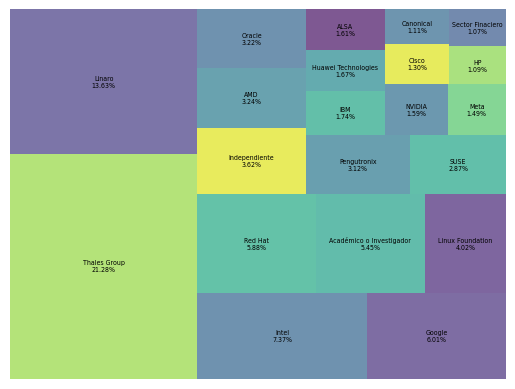

In [181]:
# Gráficar en un mapa de árbol el top 20 para tener una perspectiva más visual

etiquetas_con_porcentajes = [f'{label}\n{percent:.2f}%' for label, percent in zip(df_ag.head(21)['Empresa'], df_ag.head(21)['Porcentaje'])]
squarify.plot(sizes=df_ag.head(21)['Porcentaje'], label=etiquetas_con_porcentajes, alpha=0.7)
# squarify.plot(sizes=df_ag.head(21)['commits'].tolist(), label=df_ag.head(21)['Empresa'], alpha=0.7)
plt.axis('off')
plt.rcParams['font.size'] = 4.5
plt.savefig('resultados_ac.pdf', dpi=300, bbox_inches='tight')


## Nube de palabras de los actores


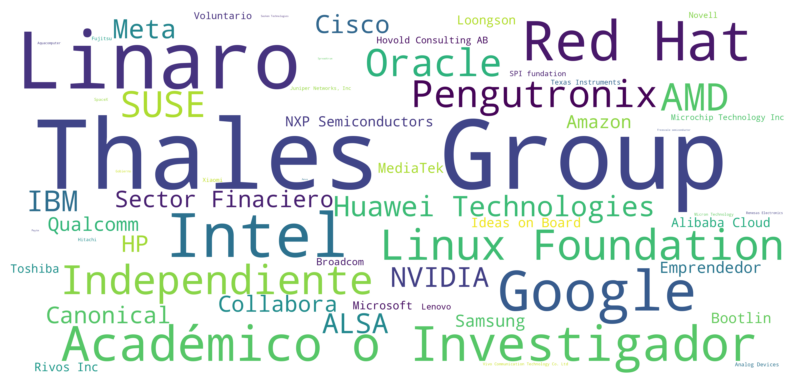

In [191]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Calcular porcentajes
total_commits = df_ag['commits'].sum()
df_ag['Porcentaje'] = (df_ag['commits'] / total_commits) * 100

# Crear un diccionario de frecuencias para cada palabra
frecuencias = dict(zip(df_ag['Empresa'], df_ag['Porcentaje']))

# Crear la nube de palabras con frecuencias
wordcloud = WordCloud(width=3840, height=1800, background_color='white', prefer_horizontal=1.0, relative_scaling=0.5).generate_from_frequencies(frecuencias)

# Nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Empresas_A_Propio_cambios_realizados.pdf', dpi=300, bbox_inches='tight')



# Análisis de las Estadísticas Oficiales

En este breve script, aprovechamos las bibliotecas BeautifulSoup y pandas para extraer estadísticas del sitio web "https://lwn.net/Articles/948970/", el cual contiene información sobre la última versión del kernel 6.6. Este sitio proporciona datos detallados sobre los principales contribuyentes al código fuente de GNU/Linux, basados en diversas fuentes de información. Una de las ventajas de estas estadísticas es que muestran tanto sugerencias de cambios (commits) como cambios efectuados (pull requests). A continuación se presentan las estadísticas extraídas del sitio web.

In [1]:
import pandas as pd
from bs4 import BeautifulSoup


directorio = '/home/carlos/Tesis/TESIS FE UNAM/Apendice_A/linux/'

# Ruta al archivo HTML local
archivo_html = '/home/carlos/Tesis/TESIS FE UNAM/Apendice_A/webs/Some 6.6 development statistics [LWN.net].html'

# Leer el archivo HTML
with open(archivo_html, 'r') as file:
    html_content = file.read()

# Utilizar BeautifulSoup para analizar el contenido HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Encontrar todas las filas de la tabla
rows = soup.find_all('tr')

# Crear una lista vacía para almacenar los datos
data = []

# Iterar sobre las filas de la tabla (omitimos la primera fila con los encabezados)
for row in rows[1:]:
    columns = row.find_all('td')
    # Verificar si hay suficientes columnas en la fila
    if len(columns) >= 3:
        # Extraer los datos de cada columna en la fila
        empresa = columns[0].text.strip()
        valor = columns[1].text.strip()
        porcentaje = columns[2].text.strip()
        # Agregar los datos a la lista
        data.append({'Empresa': empresa, 'Valor': valor, 'Porcentaje': porcentaje})

# Crear un DataFrame a partir de la lista de diccionarios
df = pd.DataFrame(data)


# Programadores más activos cambios sugeridos

Programadores_activos_cambios_sugeridos = df.iloc[0:21].reset_index()
Programadores_activos_cambios_sugeridos.drop('index', axis=1,inplace=True)
Programadores_activos_cambios_sugeridos.drop(0,axis=0,inplace=True) 
Programadores_activos_cambios_sugeridos.rename(columns={'Empresa': 'Contribuidor'}, inplace=True)

# Programadores más activos cambios realizados

Programadores_activos_cambios_realizados = df.iloc[20:41].reset_index()
Programadores_activos_cambios_realizados.drop('index', axis=1,inplace=True)
Programadores_activos_cambios_realizados.drop(0,axis=0,inplace=True)
Programadores_activos_cambios_realizados.rename(columns={'Empresa': 'Contribuidor'}, inplace=True)


# Empresas por cambios sugeridos  

Empresas_Cambios_Sugeridos = df.iloc[70:91].reset_index()
Empresas_Cambios_Sugeridos.drop('index', axis=1,inplace=True)
Empresas_Cambios_Sugeridos.drop(0,axis=0,inplace=True) 


# Empresas por cambios realizados

Empresas_Cambios_Realizados = df.iloc[90:111].reset_index()

Empresas_Cambios_Realizados.drop('index', axis=1,inplace=True)
Empresas_Cambios_Realizados.drop(0,axis=0,inplace=True) 

# Exportar las dataframe de las estadísticas oficales a CSV

In [6]:
Empresas_Cambios_Realizados.to_csv('/home/carlos/Tesis/TESIS FE UNAM/Apendice_A/Datasets/Oficial_stat_cambios_realizados.csv', index=0)
Programadores_activos_cambios_realizados.to_csv('/home/carlos/Tesis/TESIS FE UNAM/Apendice_A/Datasets/Oficial_stat_cambios_realizados_programadores.csv', index=0)

# Gráfico de barras


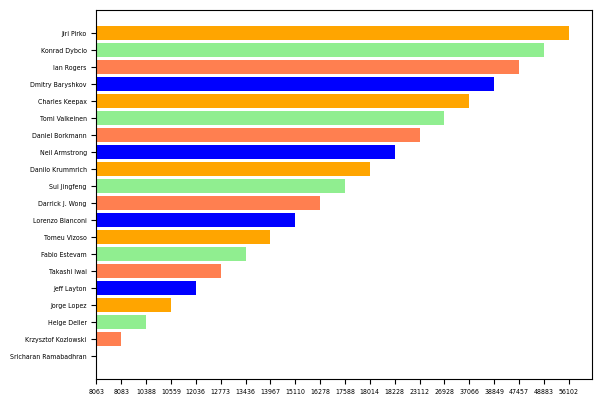

In [128]:
colores = ['blue', 'coral', 'lightgreen', 'orange']
plt.barh(Programadores_activos_cambios_realizados['Contribuidor'][::-1], Empresas_Cambios_Realizados['Valor'][::-1], color = colores)
plt.savefig('Programadores_activos_cambios_realizados_barras.pdf', dpi=300, bbox_inches='tight')

## Gŕafico de árbol 

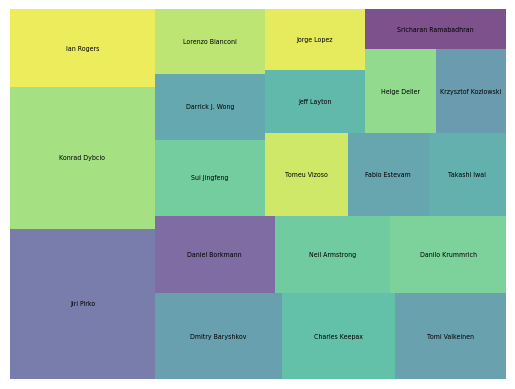

In [129]:
Programadores_activos_cambios_realizados
squarify.plot(sizes=Programadores_activos_cambios_realizados['Valor'].astype(float).tolist(), label=Programadores_activos_cambios_realizados['Contribuidor'], alpha=0.7)
plt.axis('off')
plt.rcParams['font.size'] = 4.5
plt.savefig('Programadores_activos_cambios_realizados_arbol.pdf', dpi=300, bbox_inches='tight')


### Tabla de contribuidores por cambios realizados 

In [130]:
Programadores_activos_cambios_realizados


Contribuidor  Valor Porcentaje
1              Jiri Pirko  17444       3.0%
2           Konrad Dybcio  16477       2.8%
3              Ian Rogers   8991       1.5%
4        Dmitry Baryshkov   8729       1.5%
5          Charles Keepax   7834       1.3%
6          Tomi Valkeinen   7647       1.3%
7         Daniel Borkmann   7356       1.2%
8          Neil Armstrong   7124       1.2%
9        Danilo Krummrich   7122       1.2%
10           Sui Jingfeng   6731       1.1%
11        Darrick J. Wong   5819       1.0%
12       Lorenzo Bianconi   5658       1.0%
13           Tomeu Vizoso   5508       0.9%
14          Fabio Estevam   5381       0.9%
15           Takashi Iwai   5144       0.9%
16            Jeff Layton   5064       0.9%
17            Jorge Lopez   4821       0.8%
18           Helge Deller   4742       0.8%
19    Krzysztof Kozlowski   4705       0.8%
20  Sricharan Ramabadhran   4506       0.8%

## Tabla de empresas por cambios realizados

In [131]:
Empresas_Cambios_Realizados

Empresa  Valor Porcentaje
1               Red Hat  56102       9.5%
2                Linaro  48883       8.3%
3                 Intel  47457       8.0%
4                NVIDIA  38849       6.6%
5                Google  37066       6.3%
6                   AMD  26928       4.6%
7             (Unknown)  23112       3.9%
8                Oracle  18228       3.1%
9                (None)  18014       3.0%
10                  IBM  17588       3.0%
11                 SUSE  16278       2.8%
12         Cirrus Logic  15110       2.6%
13                 Meta  13967       2.4%
14  Huawei Technologies  13436       2.3%
15             Qualcomm  12773       2.2%
16    Texas Instruments  12036       2.0%
17             Loongson  10559       1.8%
18            Collabora  10388       1.8%
19       Ideas on Board   8083       1.4%
20             MediaTek   8063       1.4%

## Gŕafica de barras empresas cambios realizados

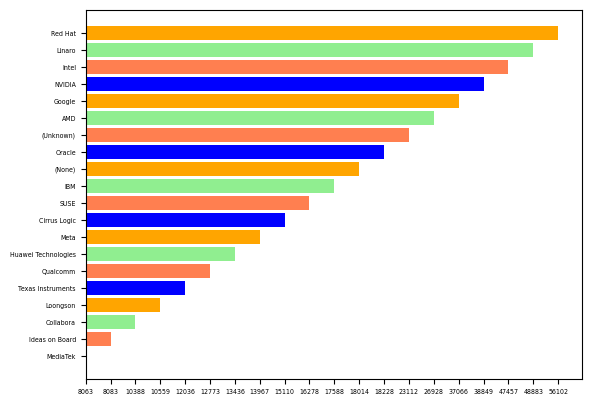

In [30]:
colores = ['blue', 'coral', 'lightgreen', 'orange']
plt.barh(Empresas_Cambios_Realizados['Empresa'][::-1], Empresas_Cambios_Realizados['Valor'][::-1], color = colores)
plt.savefig('Empresas_Cambios_Realizados.pdf', dpi=300, bbox_inches='tight')

Se utiliza el módulo `re` (expresiones regulares) de Python para reemplazar palabras en un DataFrame basado en un diccionario predefinido de empresas clave y sus posibles variantes o palabras clave. Aquí está la explicación detallada del código:

1. **Uso del módulo `re`:**
   Se utiliza la biblioteca `re` para manejar expresiones regulares, que permiten encontrar patrones específicos en cadenas de texto.

2. **Iteración a través del diccionario `empresas_claves`:**
   El código recorre cada clave-valor del diccionario `empresas_claves`. Para cada clave (nombre de la empresa), se itera a través de sus posibles variantes o palabras clave.

3. **Construcción del patrón de búsqueda:**
   - Se utiliza la función `re.escape()` para escapar cualquier carácter especial en la palabra clave de la empresa. Esto es útil para que la expresión regular busque la palabra exacta sin tener en cuenta caracteres especiales que puedan afectar la búsqueda.
   - El patrón de búsqueda se construye con límites de palabra (`\b`), lo que significa que coincidirá solo con la palabra exacta, evitando coincidencias parciales.

4. **Aplicación del patrón de búsqueda y reemplazo:**
   - Para cada palabra clave de la empresa, se crea un patrón de búsqueda con límites de palabra.
   - Luego, se aplica este patrón a la columna del DataFrame `Empresas_Cambios_Sugeridos` usando `re.sub()`. `re.sub()` busca todas las coincidencias del patrón en la columna y las reemplaza con la clave de la empresa correspondiente.

5. **Aplicación de la función lambda:**
   La función `lambda` se utiliza para aplicar la función `re.sub()` a cada elemento de la columna del DataFrame.

6. **Reemplazo en el DataFrame:**
   - El reemplazo se hace en la columna `Empresa` del DataFrame `Empresas_Cambios_Sugeridos`.
   - Se actualiza la columna `Empresa` con las coincidencias encontradas y se reemplazan por las claves del diccionario `empresas_claves` según corresponda.

Esencialmente, este código busca las palabras clave de las empresas en el DataFrame y las reemplaza por el nombre de la empresa correspondiente según el diccionario `empresas_claves`. Las palabras clave se buscan con límites de palabra, lo que garantiza que solo se reemplacen las palabras exactas y no las parciales que podrían causar conflictos o errores en el reemplazo.

In [31]:
import re

# función buscar empresas 

def find_matching_empresa(word, empresas_claves):
    for empresa, palabras_clave in empresas_claves.items():
        for palabra in palabras_clave:
            if re.search(fr'\b{re.escape(palabra)}\b', word, flags=re.IGNORECASE):
                return empresa
    return 'Independiente'

Empresas_Cambios_Sugeridos['Empresa'] = Empresas_Cambios_Sugeridos['Empresa'].apply(lambda x: find_matching_empresa(x, empresas_claves))


### Tabla Empresas por cambios sugeridos

In [124]:
Empresas_Cambios_Realizados

Empresa  Valor Porcentaje
1               Red Hat  56102       9.5%
2                Linaro  48883       8.3%
3                 Intel  47457       8.0%
4                NVIDIA  38849       6.6%
5                Google  37066       6.3%
6                   AMD  26928       4.6%
7             (Unknown)  23112       3.9%
8                Oracle  18228       3.1%
9                (None)  18014       3.0%
10                  IBM  17588       3.0%
11                 SUSE  16278       2.8%
12         Cirrus Logic  15110       2.6%
13                 Meta  13967       2.4%
14  Huawei Technologies  13436       2.3%
15             Qualcomm  12773       2.2%
16    Texas Instruments  12036       2.0%
17             Loongson  10559       1.8%
18            Collabora  10388       1.8%
19       Ideas on Board   8083       1.4%
20             MediaTek   8063       1.4%

## Comparativo entre las estadísticas Oficiales y propias

'X' representa nuestro cálculo y 'Y' las estadísticas oficiales 

In [152]:
# El porcentaje de la valuación 

df_comparar = pd.merge(left=df_ag, right=Empresas_Cambios_Realizados, how='outer', on='Empresa')
df_comparar['Porcentaje_y'] = df_comparar['Porcentaje_y'].str.rstrip('%').astype(float)
#df_sin_nan = df_comparar.dropna(subset=['Porcentaje_y'])
#df_sin_nan
df_comparar 

Empresa  commits  Porcentaje_x  Valor  Porcentaje_y
0              Thales Group   2713.0         21.28    NaN           NaN
1                    Linaro   1738.0         13.63  48883           8.3
2                     Intel    940.0          7.37  47457           8.0
3                    Google    766.0          6.01  37066           6.3
4                   Red Hat    749.0          5.88  56102           9.5
..                      ...      ...           ...    ...           ...
58  Freescale semiconductor      1.0          0.01    NaN           NaN
59                (Unknown)      NaN           NaN  23112           3.9
60                   (None)      NaN           NaN  18014           3.0
61             Cirrus Logic      NaN           NaN  15110           2.6
62      Huawei Technologies      NaN           NaN  13436           2.3

[63 rows x 5 columns]

## Comparamos sin 'Nan'

In [155]:
df_sin_nan = df_comparar.dropna(subset=['Porcentaje_y']).reset_index(drop=True)
df_sin_nan 

Empresa  commits  Porcentaje_x  Valor  Porcentaje_y
0                Linaro   1738.0         13.63  48883           8.3
1                 Intel    940.0          7.37  47457           8.0
2                Google    766.0          6.01  37066           6.3
3               Red Hat    749.0          5.88  56102           9.5
4                   AMD    413.0          3.24  26928           4.6
5                Oracle    411.0          3.22  18228           3.1
6                  SUSE    366.0          2.87  16278           2.8
7                   IBM    222.0          1.74  17588           3.0
8                NVIDIA    203.0          1.59  38849           6.6
9                  Meta    190.0          1.49  13967           2.4
10            Collabora    128.0          1.00  10388           1.8
11             Qualcomm     90.0          0.71  12773           2.2
12             MediaTek     46.0          0.36   8063           1.4
13       Ideas on Board     42.0          0.33   8083           1.4
14             Loongson     36.0          0.28  10559           1.8
15    Texas Instruments     11.0          0.09  12036           2.0
16            (Unknown)      NaN           NaN  23112           3.9
17               (None)      NaN           NaN  18014           3.0
18         Cirrus Logic      NaN           NaN  15110           2.6
19  Huawei Technologies      NaN           NaN  13436           2.3

 ## Correlación

Realizamos una correlación simple para ver si los porcentajes tienen relación entre sí y confirmamos que existe una correlación positiva con las estadísticas oficiales. Es decir nuestra muestra es representativa de la realidad.  

In [156]:
correlacion = df_sin_nan['Porcentaje_x'].corr(df_sin_nan['Porcentaje_y'])
correlacion

0.8088760651810218

In [136]:
lista_autores = Programadores_activos_cambios_realizados.Contribuidor.to_list()
#lista_autores

In [ ]:
authors_keywords_3 = find_authors_keywords(lista_autores,
                                           palabra_semantica='kernel',
                                           aleatorio_i=1,aleatorio_f=2)

df_n_autores_lwn_net = []
df_n_autores_lwn_net = pd.DataFrame(authors_keywords_3.items(), 
                                    columns=['Autor', 'Palabras_Clave'])

In [38]:
df_n_autores_lwn_net['Empresa'] = df_n_autores_lwn_net['Palabras_Clave'].apply(lambda 
                                                                               palabras_clave_autor: encontrar_primera_coincidencia
                                                                               (palabras_clave_autor, empresas_claves))
df_n_autores_lwn_net

Autor                                     Palabras_Clave  \
0              Jiri Pirko  [From: Jiri Pirko <jiri@resnulli.us> To: Andre...   
1           Konrad Dybcio  [I'm Konrad, a 20 y/o Linux kernel / embedded ...   
2              Ian Rogers  [I am a staff engineer for Google working on t...   
3        Dmitry Baryshkov  [Dmitry's main area of interest is the Linux k...   
4          Charles Keepax  [Forked from tinyalsa/tinyalsa. Tiny library t...   
5          Tomi Valkeinen  [Linux kernel expert with lots of experience o...   
6         Daniel Borkmann  [Daniel Borkmann · Main plumbing: Linux kernel...   
7          Neil Armstrong  [My principal expertise is Open-Source softwar...   
8        Danilo Krummrich  [Forked from torvalds/linux. Linux kernel sour...   
9            Sui Jingfeng  [20 nov 2021 · All of lore.kernel.org · help /...   
10        Darrick J. Wong  [I design, implement, and support a wide varie...   
11       Lorenzo Bianconi  [I'm a C/C++/Java/Python developer; my area of...   
12           Tomeu Vizoso  [29 may 2023 · ... kernel release series and t...   
13          Fabio Estevam  [19 ago 2020 · All of lore.kernel.org · help /...   
14           Takashi Iwai  [tiwai has 22 repositories available. Follow t...   
15            Jeff Layton  [20 feb 2023 · A few months ago, I transitione...   
16            Jorge Lopez  [Highly motivated, and resourceful Software En...   
17           Helge Deller  [... kernel and Debian-ports arch maintainer. ...   
18    Krzysztof Kozlowski  [Linux Kernel Engineer/Developer * Linux Kerne...   
19  Sricharan Ramabadhran  [This is a public inbox, see mirroring instruc...   

          Empresa  
0          NVIDIA  
1          Linaro  
2          Google  
3        Qualcomm  
4            ALSA  
5          Linaro  
6   Independiente  
7          Linaro  
8           Intel  
9     Pengutronix  
10           Meta  
11        Red Hat  
12      Collabora  
13         Linaro  
14           ALSA  
15             HP  
16        Red Hat  
17             HP  
18         Linaro  
19         Linaro

In [50]:
columnas_e = ['Autor','Empresa']
df_n_autores_lwn_net[columnas_e].to_csv('df_n_autores_lwn_net.csv', index=0)

## Referencias:

* Bruce, P., Bruce, A., & Gedeck, P. (2022). Estadística práctica para ciencia de datos con R y Python. Marcombo.
* Anáhuac Online. (2022). Análisis de datos con pandas p1. [Contenido creado para Anáhuac Online]. 
* Anáhuac Online. (2022). Análisis de datos con pandas p2. [Contenido creado para Anáhuac Online].
* Delgado Quintero, Sergio. "Aprende Python." Última modificación [30 Noviembre del 2023], https://aprendepython.es/.


In [5]:
%%bash
jupyter nbconvert --to pdf Apendice_A.ipynb


[NbConvertApp] Converting notebook Apendice_A.ipynb to pdf
/usr/lib/python3.12/site-packages/nbformat/__init__.py:93: MissingIDFieldWarning: Code cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)
/usr/lib/python3.12/site-packages/nbconvert/utils/pandoc.py:51: RuntimeWarning: You are using an unsupported version of pandoc (3.1.3).
Your version must be at least (1.12.1) but less than (3.0.0).
Refer to https://pandoc.org/installing.html.
Continuing with doubts...
  check_pandoc_version()
[NbConvertApp] Support files will be in Apendice_A_files/
[NbConvertApp] Making directory ./Apendice_A_files
[NbConvertApp] Making directory ./Apendice_A_files
[NbConvertApp] Making directory ./Apendice_A_files
[NbConvertApp] Making directory ./Ap